## Installation

In [14]:
# !pip install matplotlib
#!pip install yfinance

## Importing the required libraries and modules


In [15]:
import yfinance as yf
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

## Getting the stock data

In [16]:
stock_symbl = "GOOGL"

In [17]:
stock_data = yf.Ticker(stock_symbl)


In [18]:
hist = stock_data.history(period = '1mo')

In [19]:
print(hist)

                                 Open        High         Low       Close  \
Date                                                                        
2025-09-24 00:00:00-04:00  251.660004  252.350006  246.440002  247.139999   
2025-09-25 00:00:00-04:00  244.399994  246.490005  240.740005  245.789993   
2025-09-26 00:00:00-04:00  247.070007  249.419998  245.970001  246.539993   
2025-09-29 00:00:00-04:00  247.850006  251.149994  242.770004  244.050003   
2025-09-30 00:00:00-04:00  242.809998  243.289993  239.250000  243.100006   
2025-10-01 00:00:00-04:00  240.750000  246.300003  238.610001  244.899994   
2025-10-02 00:00:00-04:00  245.149994  246.809998  242.300003  245.690002   
2025-10-03 00:00:00-04:00  244.490005  246.300003  241.660004  245.350006   
2025-10-06 00:00:00-04:00  244.779999  251.320007  244.580002  250.429993   
2025-10-07 00:00:00-04:00  248.270004  250.440002  245.520004  245.759995   
2025-10-08 00:00:00-04:00  244.960007  246.009995  243.820007  244.619995   

In [20]:
hist.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [21]:
close_price = hist['Close']
print("Closing price is :" , close_price.tail())

Closing price is : Date
2025-10-17 00:00:00-04:00    253.300003
2025-10-20 00:00:00-04:00    256.549988
2025-10-21 00:00:00-04:00    250.460007
2025-10-22 00:00:00-04:00    251.690002
2025-10-23 00:00:00-04:00    253.080002
Name: Close, dtype: float64


In [22]:
stocks = ['AMZN','MSFT','GOOGL','AAPL']

data1 = yf.download(stocks , start = '2024-01-01' , end = '2025-10-14')
print(data1.head())

C:\Users\Himanshu\AppData\Local\Temp\ipykernel_23684\3660371284.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data1 = yf.download(stocks , start = '2024-01-01' , end = '2025-10-14')
[*********************100%***********************]  4 of 4 completed

Price            Close                                            High  \
Ticker            AAPL        AMZN       GOOGL        MSFT        AAPL   
Date                                                                     
2024-01-02  184.081512  149.929993  137.223541  366.105530  186.858009   
2024-01-03  182.703186  148.470001  137.968399  365.838989  184.319507   
2024-01-04  180.382812  144.570007  135.455734  363.213226  181.552899   
2024-01-05  179.658920  145.240005  134.800293  363.025665  181.225657   
2024-01-08  184.002167  149.100006  137.888947  369.876434  184.041839   

Price                                                  Low              \
Ticker            AMZN       GOOGL        MSFT        AAPL        AMZN   
Date                                                                     
2024-01-02  152.380005  138.494772  371.070910  182.346204  148.389999   
2024-01-03  151.050003  138.673542  368.464820  181.890063  148.330002   
2024-01-04  147.380005  138.206764  3

In [23]:
closed_price = data1['Close']
print(closed_price)
closed_price.columns


Ticker            AAPL        AMZN       GOOGL        MSFT
Date                                                      
2024-01-02  184.081512  149.929993  137.223541  366.105530
2024-01-03  182.703186  148.470001  137.968399  365.838989
2024-01-04  180.382812  144.570007  135.455734  363.213226
2024-01-05  179.658920  145.240005  134.800293  363.025665
2024-01-08  184.002167  149.100006  137.888947  369.876434
...                ...         ...         ...         ...
2025-10-07  256.480011  221.779999  245.759995  523.979980
2025-10-08  258.059998  225.220001  244.619995  524.849976
2025-10-09  254.039993  227.740005  241.529999  522.400024
2025-10-10  245.270004  216.369995  236.570007  510.959991
2025-10-13  247.660004  220.070007  244.149994  514.049988

[447 rows x 4 columns]


Index(['AAPL', 'AMZN', 'GOOGL', 'MSFT'], dtype='object', name='Ticker')

In [24]:
df = closed_price.reset_index()
df.head()

Ticker,Date,AAPL,AMZN,GOOGL,MSFT
0,2024-01-02,184.081512,149.929993,137.223541,366.105530
1,2024-01-03,182.703186,148.470001,137.968399,365.838989
2,2024-01-04,180.382812,144.570007,135.455734,363.213226
3,2024-01-05,179.658920,145.240005,134.800293,363.025665
4,2024-01-08,184.002167,149.100006,137.888947,369.876434


## Plotting

<Axes: xlabel='Date'>

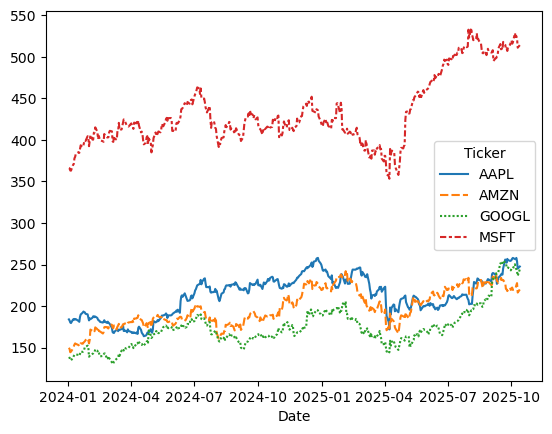

In [25]:

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date' , inplace = True)
sns.lineplot(df)

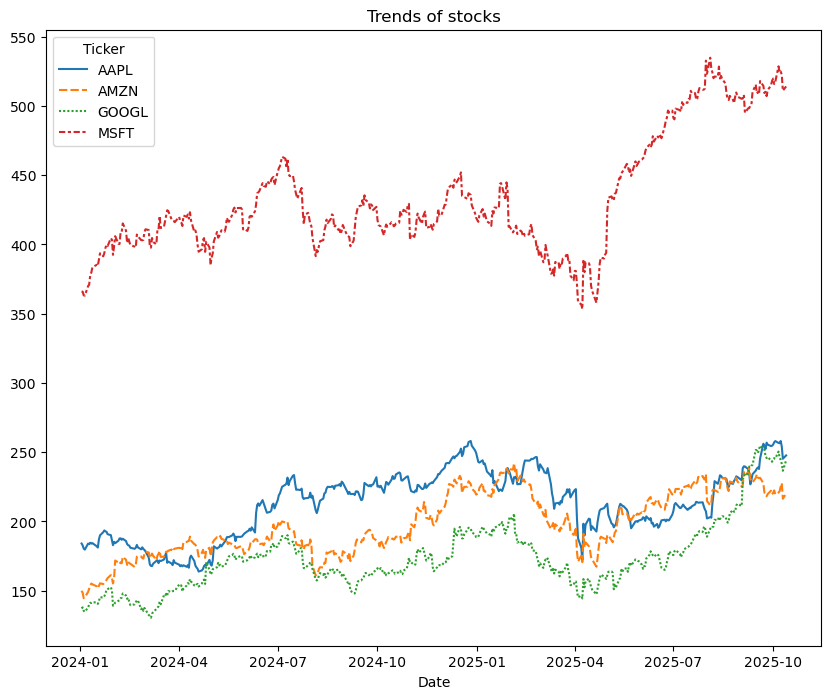

In [26]:
plt.figure(figsize = (10,8))
sns.lineplot(df)
plt.title("Trends of stocks")
plt.show()

## Calculating the Returns

In [27]:
daily_returns = df.pct_change().dropna()
daily_returns.head()

Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2024-01-03,-0.007488,-0.009738,0.005428,-0.000728
2024-01-04,-0.012700,-0.026268,-0.018212,-0.007177
2024-01-05,-0.004013,0.004634,-0.004839,-0.000516
2024-01-08,0.024175,0.026577,0.022913,0.018871
2024-01-09,-0.002263,0.015225,0.015197,0.002936


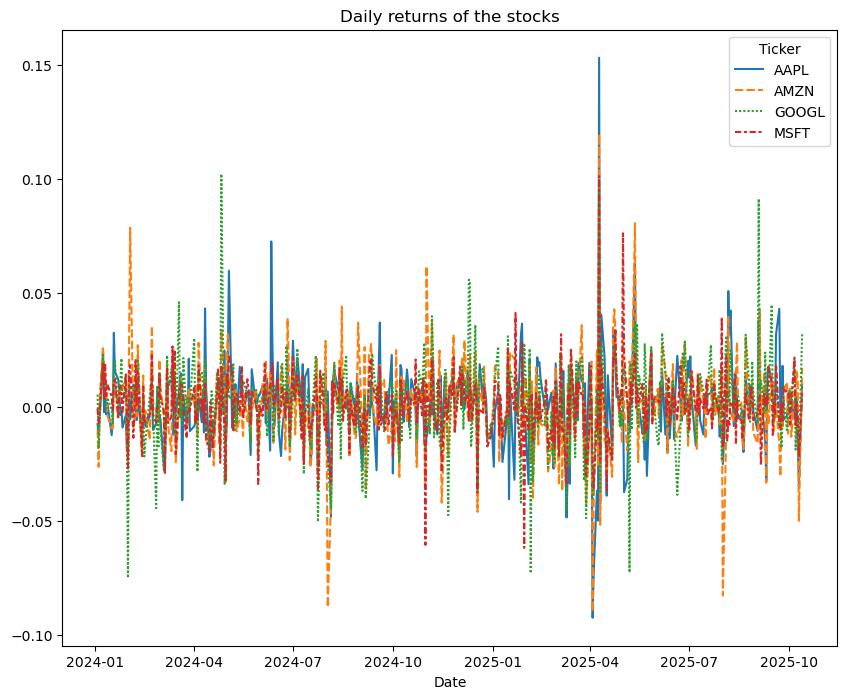

In [28]:
plt.figure(figsize = (10,8))
sns.lineplot(daily_returns)
plt.title("Daily returns of the stocks")
plt.show()

## Volatility of the stocks-Rolling standard deviation

Ticker      AAPL  AMZN  GOOGL  MSFT
Date                               
2024-01-02   NaN   NaN    NaN   NaN
2024-01-03   NaN   NaN    NaN   NaN
2024-01-04   NaN   NaN    NaN   NaN
2024-01-05   NaN   NaN    NaN   NaN
2024-01-08   NaN   NaN    NaN   NaN


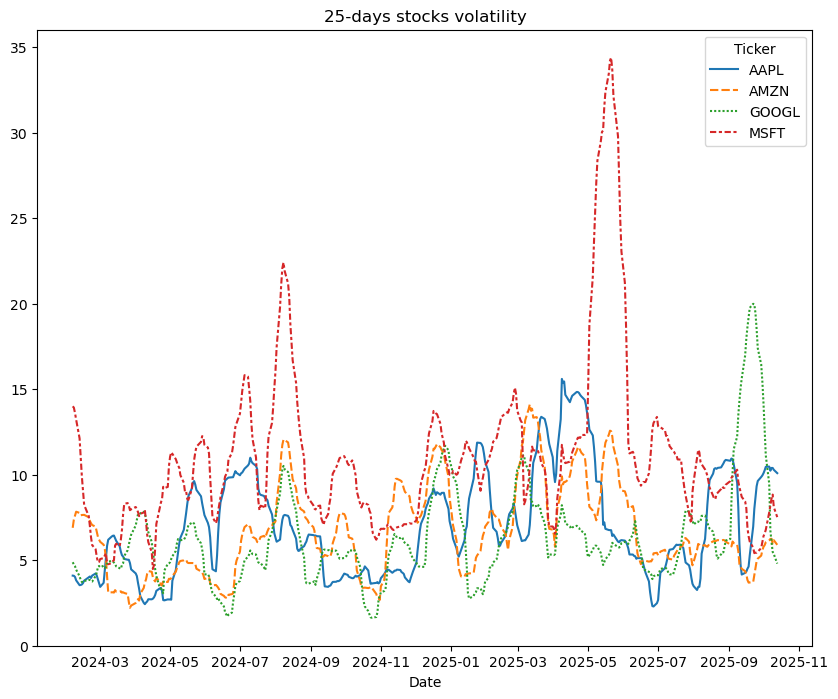

In [29]:
 

rolling_std = df.rolling(window=25).std()
print(rolling_std.head())
plt.figure(figsize = (10,8))
sns.lineplot(rolling_std)
plt.title("25-days stocks volatility")
plt.show()

## Short term fluctuation -- Moving Average

In [30]:
## MOVING AVERAGE IS OFTEN USED TO SMOOTH OUT THE SHORT TERM FLUCTUATIONS IN STOCK PRICE

df['AAPL_30MA'] = df['AAPL'].rolling(window = 30).mean()
df['AAPL_120MA'] = df['AAPL'].rolling(window = 120).mean()

df['MSFT_30MA'] = df['MSFT'].rolling(window = 30).mean()
df['MSFT_120MA'] = df['MSFT'].rolling(window = 120).mean()

df['AMZN_30MA'] = df['AMZN'].rolling(window = 30).mean()
df['AMZN_120MA'] = df['AMZN'].rolling(window = 120).mean()

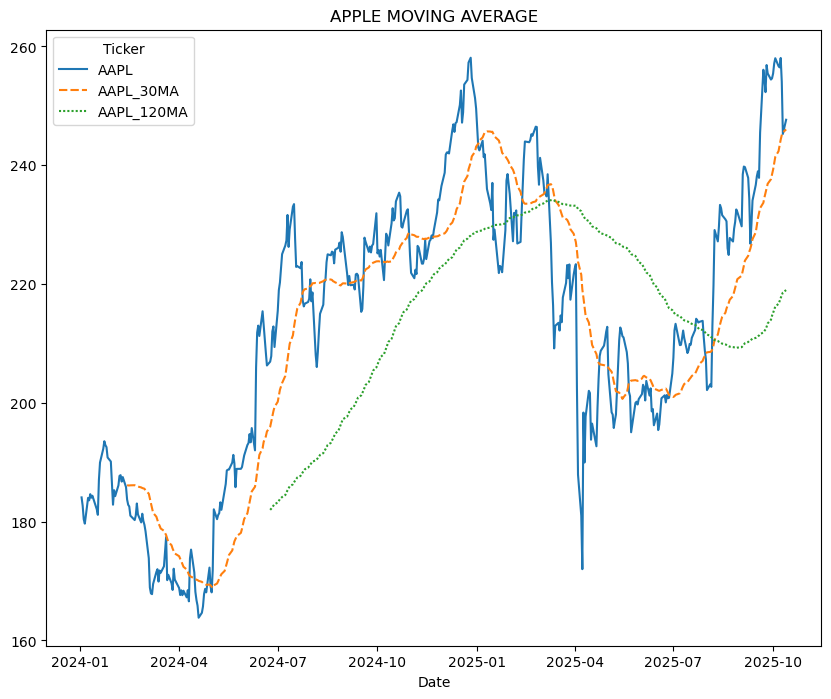

In [31]:
## APPLE

plt.figure(figsize = (10,8))
sns.lineplot(data = df[['AAPL' , 'AAPL_30MA' , 'AAPL_120MA']])
plt.title("APPLE MOVING AVERAGE")
plt.show()

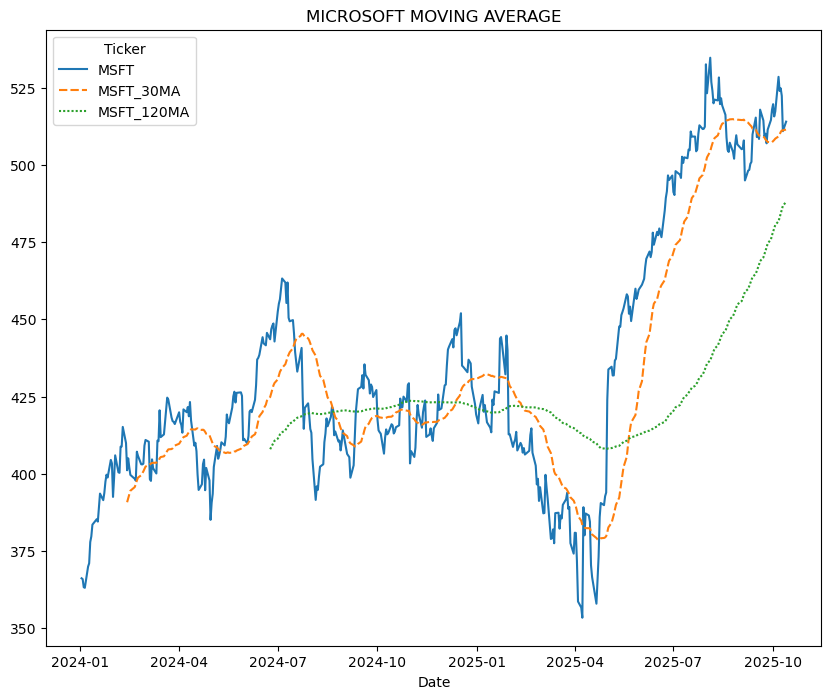

In [32]:
## MICROSOFT

plt.figure(figsize = (10,8))
sns.lineplot(data = df[['MSFT' , 'MSFT_30MA' , 'MSFT_120MA']])
plt.title("MICROSOFT MOVING AVERAGE")
plt.show()

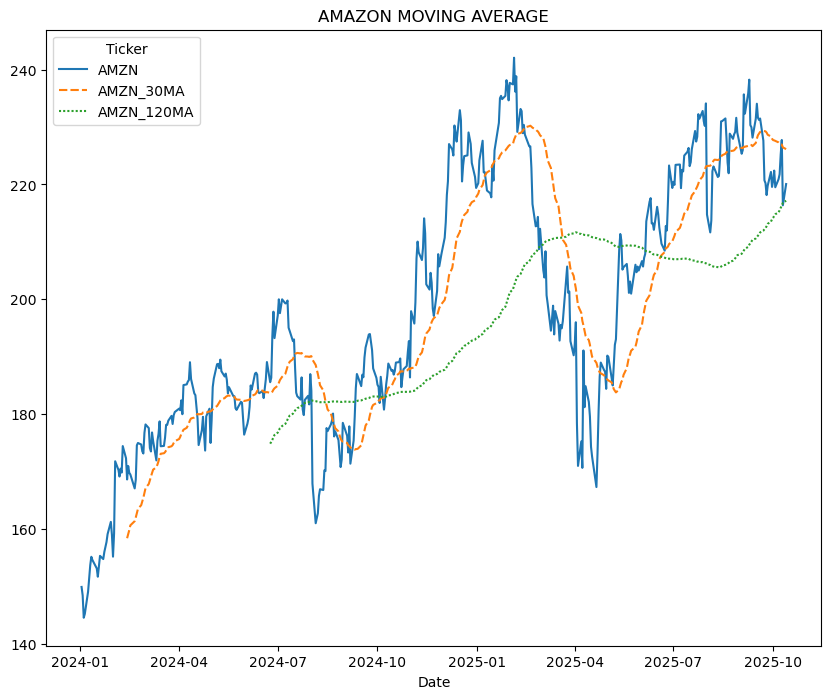

In [33]:
## AMAZON

plt.figure(figsize = (10,8))
sns.lineplot(data = df[['AMZN' , 'AMZN_30MA' , 'AMZN_120MA']])
plt.title("AMAZON MOVING AVERAGE")
plt.show()

## Correlation between the stocks

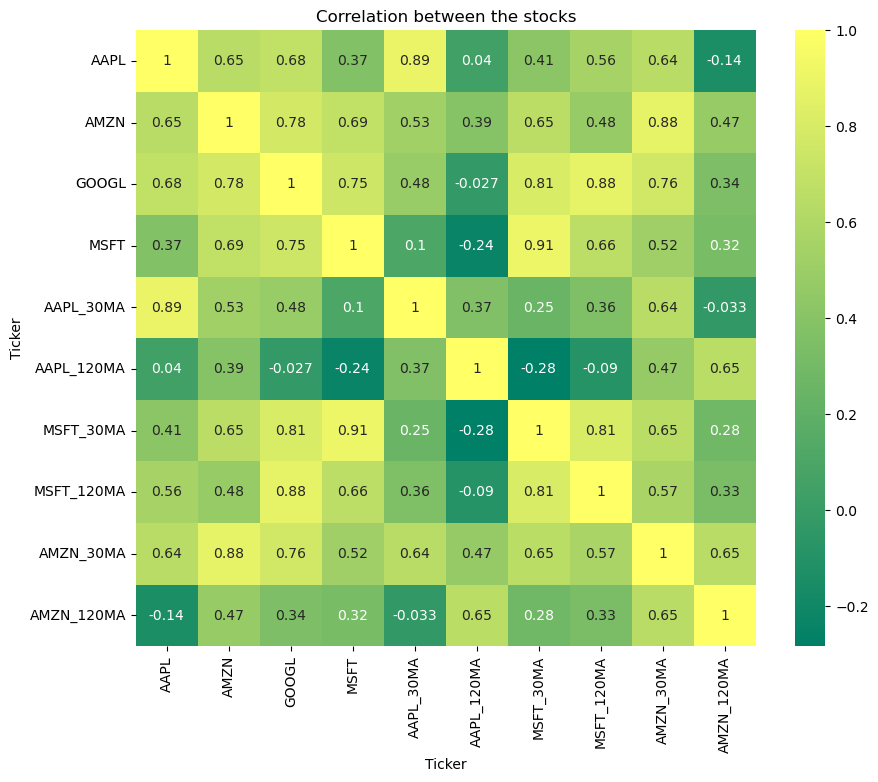

In [34]:
correlation_matrix = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix , annot = True , cmap = 'summer')
plt.title("Correlation between the stocks")
plt.show()

## Percentage change between the stocks

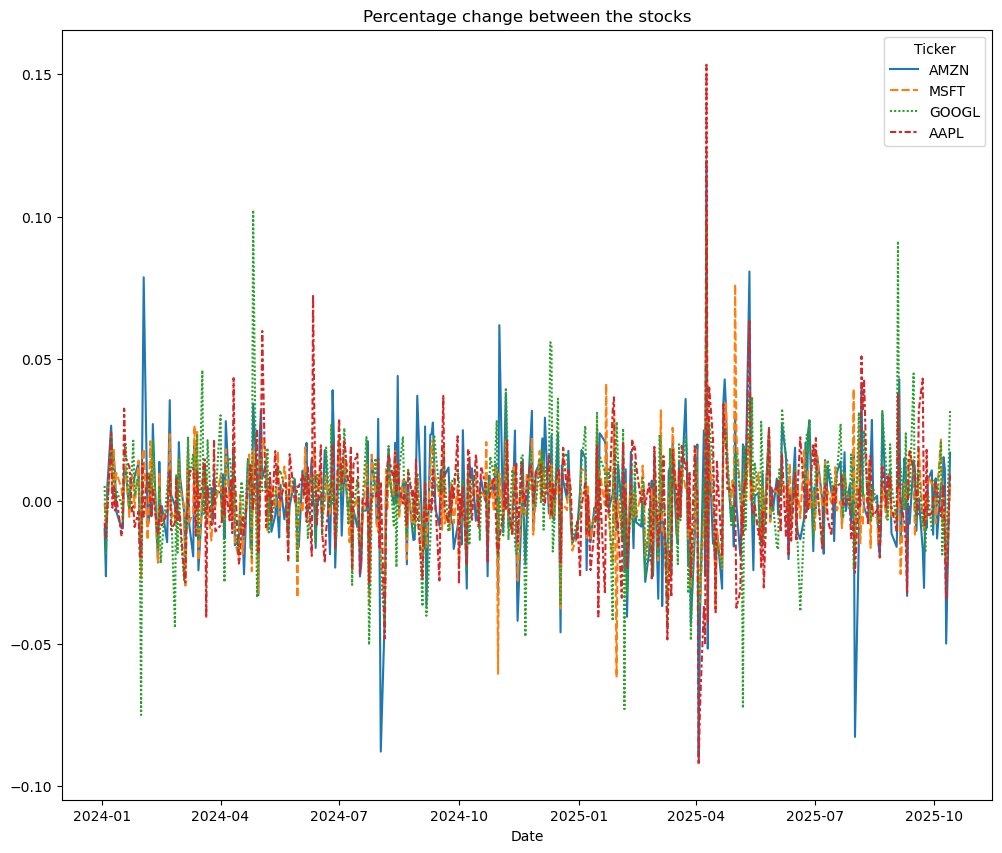

In [35]:
percentage_change = df.pct_change()
plt.figure(figsize = (12,10))
sns.lineplot(percentage_change[['AMZN','MSFT','GOOGL','AAPL']])
plt.title("Percentage change between the stocks")
plt.show()

## Cummulative Returns

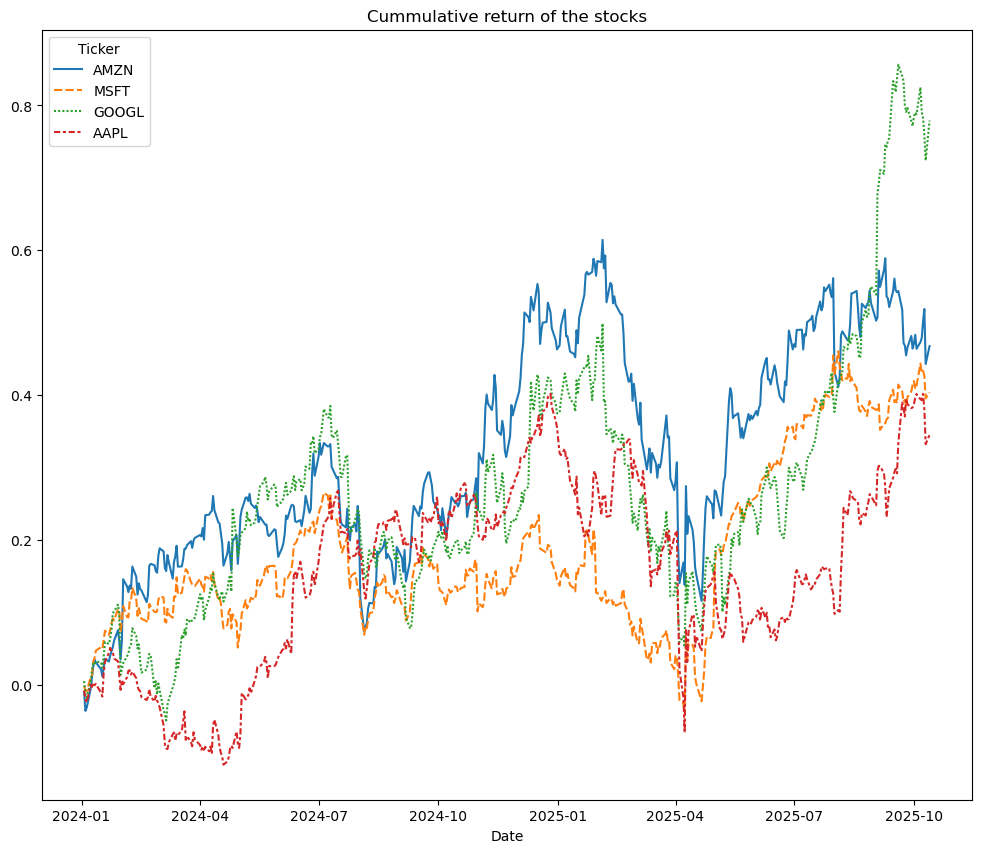

In [36]:
## This will helps to track the growth of a investment overtime

cummulative_return = (1+daily_returns).cumprod()-1 # Cummulative product
plt.figure(figsize = (12,10))
sns.lineplot(cummulative_return[['AMZN','MSFT','GOOGL','AAPL']])
plt.title("Cummulative return of the stocks")
plt.show()

## Sharp Ratio

In [37]:
## Measure of risk adjusted returns 
## It compares the returns on investment against its risk

mean_daily_return = daily_returns.mean()
std_daily_return = daily_returns.std()
sharp_ratio = mean_daily_return/std_daily_return
print(sharp_ratio)

Ticker
AAPL     0.045443
AMZN     0.053547
GOOGL    0.077301
MSFT     0.060637
dtype: float64


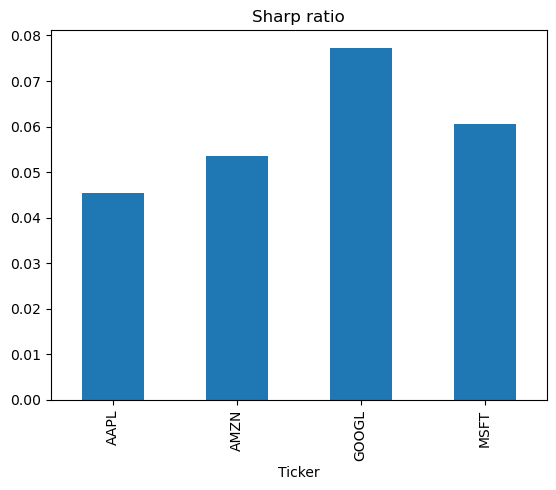

In [38]:
sharp_ratio.plot(title = 'Sharp ratio' , kind = 'bar')
plt.show()

 ## Seasonality Analysis
 

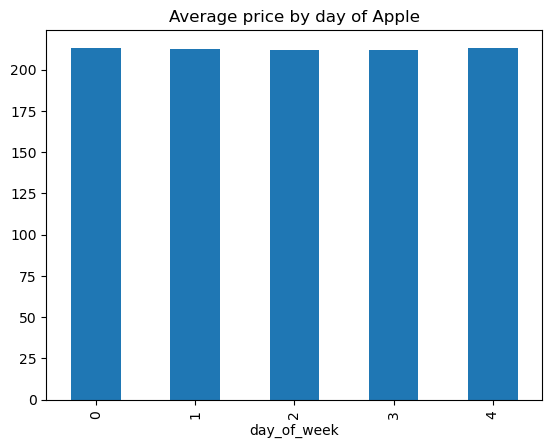

In [48]:
df['day_of_week'] =  df.index.day_of_week
average_price_by_day = df.groupby('day_of_week')['AAPL'].mean()
average_price_by_day.plot(kind = 'bar' , title = "Average price by day of Apple") 
plt.show()


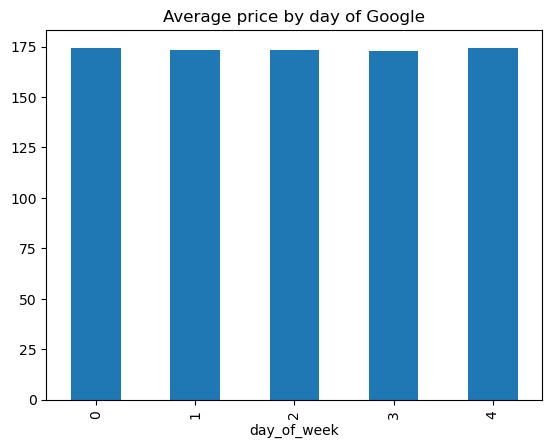

In [47]:
average_price_by_day = df.groupby('day_of_week')['GOOGL'].mean()
average_price_by_day.plot(kind = 'bar' , title = "Average price by day of Google") 
plt.show()


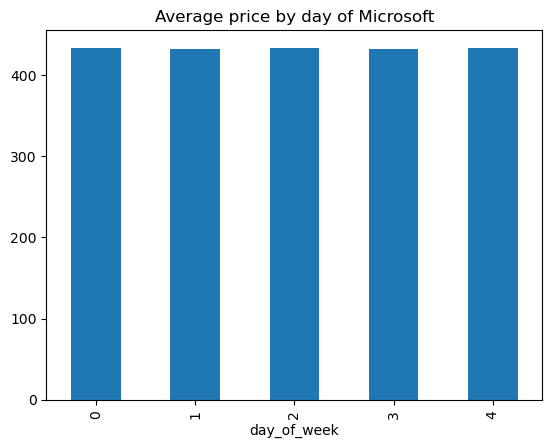

In [46]:
average_price_by_day = df.groupby('day_of_week')['MSFT'].mean()
average_price_by_day.plot(kind = 'bar' , title = "Average price by day of Microsoft") 
plt.show()


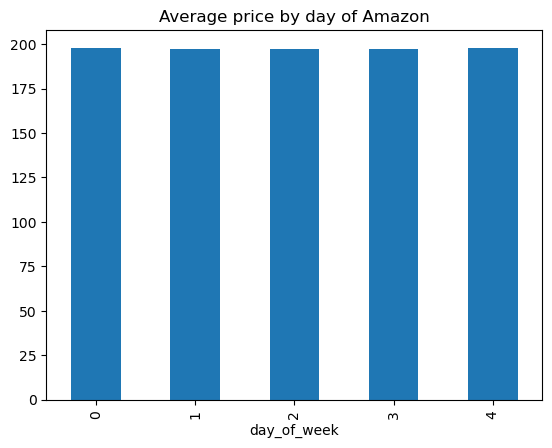

In [45]:
average_price_by_day = df.groupby('day_of_week')['AMZN'].mean()
average_price_by_day.plot(kind = 'bar' , title = "Average price by day of Amazon") 
plt.show()


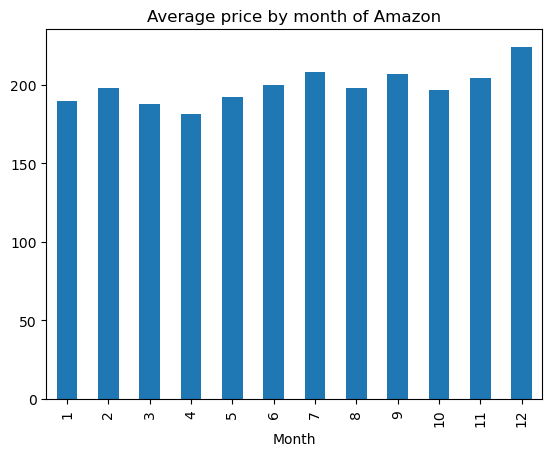

In [44]:
df['Month'] = df.index.month
average_price_by_month = df.groupby('Month')['AMZN'].mean()
average_price_by_month.plot(kind = 'bar' , title = "Average price by month of Amazon") 
plt.show()

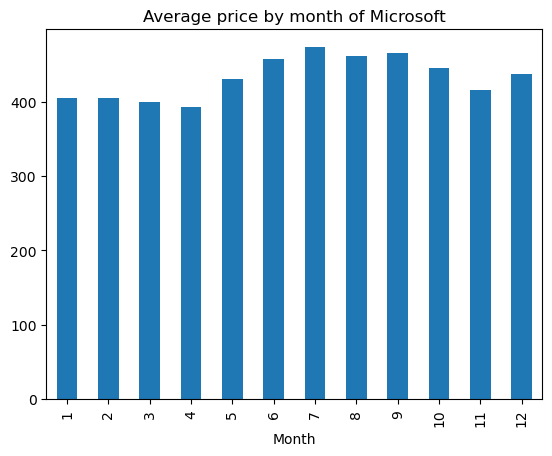

In [49]:
df['Month'] = df.index.month
average_price_by_month = df.groupby('Month')['MSFT'].mean()
average_price_by_month.plot(kind = 'bar' , title = "Average price by month of Microsoft") 
plt.show()

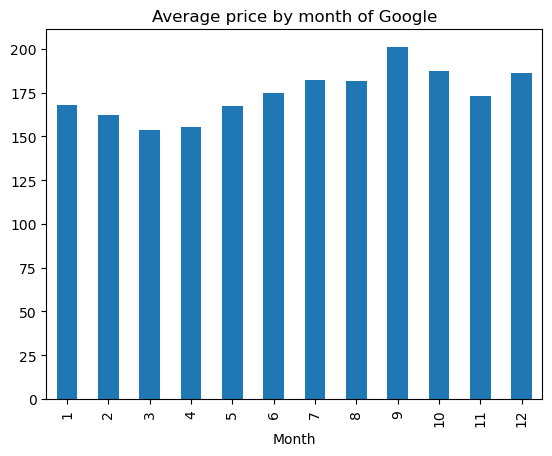

In [50]:
df['Month'] = df.index.month
average_price_by_month = df.groupby('Month')['GOOGL'].mean()
average_price_by_month.plot(kind = 'bar' , title = "Average price by month of Google") 
plt.show()

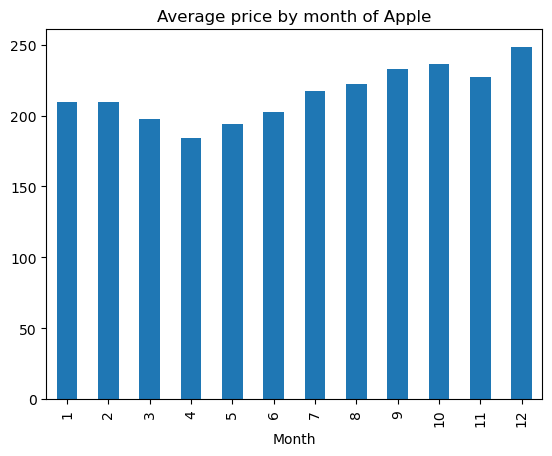

In [53]:
df['Month'] = df.index.month
average_price_by_month = df.groupby('Month')['AAPL'].mean()
average_price_by_month.plot(kind = 'bar' , title = "Average price by month of Apple") 
plt.show()

## Pairwise stock returns

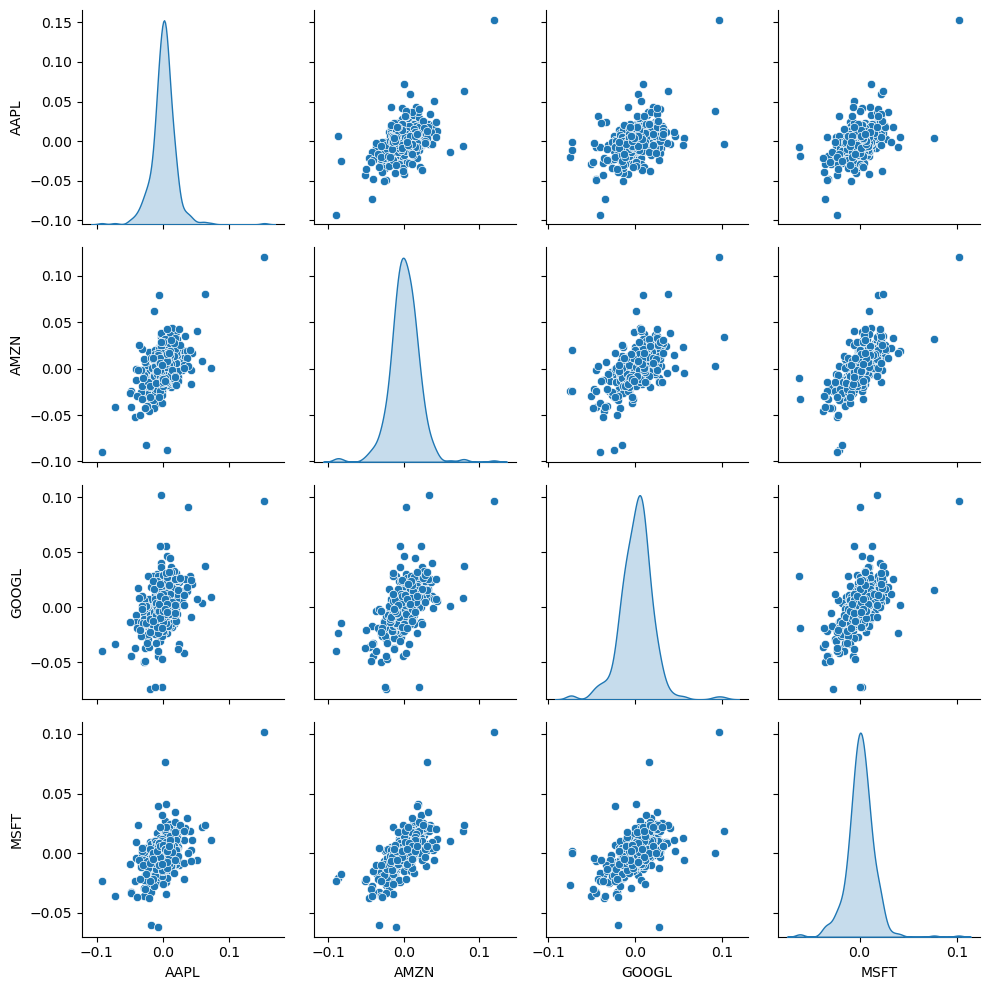

In [54]:
sns.pairplot(daily_returns , diag_kind= 'kde')
plt.tight_layout()
plt.show()

## Refresh the data for 10 min 

In [63]:
# import time
# from datetime import datetime
# stks = ['GOOGL', 'AMZN','MSFT']

# def fetch_data_plot():
#     data = yf.download(stks , start= '2025-01-01' , end = '2025-10-24')

#     close_price = data['Close']

#     plt.figure(figsize = (12,8))
#     sns.lineplot(close_price)
#     plt.title("Closing price")
#     plt.show()

# while True:
#     fetch_data_plot()
#     time.sleep(5) 
#     print("After 5 seconds" , datetime.now())
    